In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import sys
random.seed(0)
np.random.seed(0)

### spatial queue model
sys.path.insert(0, '../../../../')
import model.queue_class_ce170 as sq_loop
import model.spatial_queue_array_add_storage_remain_special_node_reroute_rtt as sq_vect

In [2]:
### Read network and demand
case='fairfax'
nodes_df = pd.read_csv('/Users/apple/Documents/GitHub/spatial_queue/benchmark_Marin/traffic_inputs/{}/new_{}_nodes_tmp.csv'.format(case,case), float_precision = "round_trip")
links_df = pd.read_csv('/Users/apple/Documents/GitHub/spatial_queue/benchmark_Marin/traffic_inputs/{}/new_{}_links_tmp.csv'.format(case,case), float_precision = "round_trip")
od_df = pd.read_csv('/Users/apple/Documents/GitHub/spatial_queue/benchmark_Marin/traffic_inputs/{}/{}_ods_day_new_tmp.csv'.format(case,case), float_precision = "round_trip")
od_df['agent_id'] = np.arange(120000, 120000 + len(od_df))
od_df.loc[:, 'departure_hour'] = 6
od_df.loc[:, 'departure_quarter'] = 0
od_df['departure_time'] = (od_df['departure_hour'] - 6) * 3600 + od_df['departure_quarter'] * 900
od_df = od_df[od_df['origin_nid']!=od_df['destin_nid']]
nodes_df['node_id'] = nodes_df['node_id'].astype(int)
print('# nodes {}, # links {}, # ods {}'.format(nodes_df.shape[0], links_df.shape[0], od_df.shape[0]))

# nodes 17857, # links 40210, # ods 3937


In [3]:
simulation_vect = sq_vect.Simulation()
simulation_vect.initialize_simulation(nodes_df, links_df, od_df)
simulation_vect.run_one_step(0, reroute_frequency=1800)
agents_routes_dict = simulation_vect.agents.agent_routes

In [4]:
selected_agents_list = [120145,123241,123594]
agents_links_dict = {}
for agent_id in selected_agents_list: #select three agents
    links_list = []
    routes = agents_routes_dict[agent_id]
    for node_u, node_v in routes.items():
        link_id_tmp = links_df.loc[(links_df['start_node_id'] == node_u) & (links_df['end_node_id'] == node_v), 'link_id'].values[0]
        links_list.append(link_id_tmp)
    agents_links_dict[agent_id] = links_list

In [5]:
agent_selected_df = pd.DataFrame(columns = ['agent_id','current_link','time'])
agent_1_df = pd.DataFrame(columns = ['agent_id','link_id','time'])
agent_2_df = pd.DataFrame(columns = ['agent_id','link_id','time'])
agent_3_df = pd.DataFrame(columns = ['agent_id','link_id','time'])

for i in range(0, 60800,100):
    path = './agent_stats_add_srsn/{}_vect_at_{}_bg_1_real_departure_time_agent.csv'.format(case,i)
    agent_df = pd.read_csv(path)
    agent_df = agent_df.loc[agent_df['agent_id'].isin(selected_agents_list), ['agent_id','current_link']]
    agent_df['time'] = i
    agent_selected_df = agent_selected_df.append(agent_df, ignore_index = True)

In [6]:
agent_selected_df['current_link'] = agent_selected_df['current_link'].astype('str')
agent_selected_df['current_link'] = agent_selected_df['current_link'].apply(lambda x: x[:-2] if x[-2:] == '.0' else x)
a = agent_selected_df.groupby(by='agent_id', as_index = False).apply(lambda x: x.sort_values('time', ascending=True))
a.reset_index(drop = True, inplace = True)

In [7]:
# add column 'length'
link_length_dict = dict(zip(links_df['link_id'].astype('str'), links_df['length']))
a['length'] = a['current_link'].map(link_length_dict).fillna(0)

In [8]:
# this is for selecting links to reflect in the QGIS
link1 = links_df.loc[links_df['link_id'].isin([15290, 31970, 7444, 35285, 15229, 26277, 11937, 7153, 12176, 7143, 58, 18977, 9668, 12414])]
link2 = links_df.loc[links_df['link_id'].isin([1420, 21240, 23002])]
link3 = links_df.loc[links_df['link_id'].isin([14449, 21564, 30429, 9688, 22980, 1408, 7470, 12936, 15644])]
link4 = links_df.loc[links_df['link_id'].isin([9699, 22125, 5056])]
link5 = links_df.loc[links_df['link_id'].isin([5833, 4402, 38005, 13318, 4834, 2940, 4849, 1247, 17681, 15372])]
link6 = links_df.loc[links_df['link_id'].isin([453,15382, 31975, 10368, 4969, 13113, 9924, 30445, 22430, 4456, 23103, 189, 15153, 17738, 11631, 6037, 17671, 12217, 178, 223, 8627, 14269, 30469, 232, 3728, 16782])]
link7 = links_df.loc[links_df['link_id'].isin([4865, 4845, 534, 12939, 2206, 8297, 31477, 31136, 16267, 5822, 9883, 30654, 31262, 9805, 37822, 31288, 7510, 11522, 16122, 29552, 8169, 10578])]
link8 = links_df.loc[links_df['link_id'].isin([28661, 30612, 28166, 16493, 22992, 922, 1496, 723, 10377, 16844, 12161, 7612, 6255, 964, 3786, 5644, 3131, 27481, 6065, 9148, 30902, 15048, 13591, 1312, 12700, 294])]
link9 = links_df.loc[links_df['link_id'].isin([9246, 4443, 38542, 34696, 38049, 36609, 39708, 31859, 40194, 1])]
link1.to_csv('./links1.csv', index = False)
link2.to_csv('./links2.csv', index = False)
link3.to_csv('./links3.csv', index = False)
link4.to_csv('./links4.csv', index = False)
link5.to_csv('./links5.csv', index = False)
link6.to_csv('./links6.csv', index = False)
link7.to_csv('./links7.csv', index = False)
link8.to_csv('./links8.csv', index = False)
link9.to_csv('./links9.csv', index = False)
link_attribute_df = pd.DataFrame(columns = ['link_id', 'link_attribute'])
for link_tmp in link1.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':1}], ignore_index = True)
for link_tmp in link2.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':2}], ignore_index = True)
for link_tmp in link3.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':3}], ignore_index = True)
for link_tmp in link4.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':4}], ignore_index = True)
for link_tmp in link5.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':5}], ignore_index = True)
for link_tmp in link6.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':6}], ignore_index = True)
for link_tmp in link7.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':7}], ignore_index = True)
for link_tmp in link8.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':8}], ignore_index = True)
for link_tmp in link9.itertuples():
    link_id = str(getattr(link_tmp, 'link_id'))
    link_attribute_df = link_attribute_df.append([{'link_id':link_id, 'link_attribute':9}], ignore_index = True)
link_attribute_dict = dict(zip(link_attribute_df['link_id'], link_attribute_df['link_attribute']))

In [ ]:
# add column 'cum_dist'
### we cannot directly use the links in the dataframe, as it records less links than real.
### This happens as the links passed are recorded every 100 s.

#agent2_routes = agents_links_dict[123241]
#agent3_routes = agents_links_dict[123594]

In [18]:
agent1_df = a[a['agent_id'] == 120145].copy()
agent1_df.reset_index(drop = True, inplace = True)
agent1_df = agent1_df.append([{'agent_id': agent1_df.loc[len(agent1_df)-1,'agent_id'], 'current_link':'1',
                               'time':agent1_df.loc[len(agent1_df)-1,'time']+100,'length':0}], ignore_index = True)
agent1_df['link_attribute'] = agent1_df['current_link'].map(link_attribute_dict).fillna(-1)

agent1_routes = agents_links_dict[120145]
agent1_routes_df = pd.DataFrame(columns = ['link_id','length'])
agent1_routes_df['link_id'] = np.array(agent1_routes)
agent1_routes_df['link_id'] = agent1_routes_df['link_id'].astype('str')
agent1_routes_df['length'] = agent1_routes_df['link_id'].map(link_length_dict)
agent1_routes_df['cum_dist'] = 0
for i in range(len(agent1_routes_df)):
    if i == 0:
        agent1_routes_df.loc[i, 'cum_dist'] = 0
    else:
         agent1_routes_df.loc[i, 'cum_dist'] = agent1_routes_df.loc[i-1, 'cum_dist'] + agent1_routes_df.loc[i-1, 'length']
agent1_routes_cum_dict = dict(zip(agent1_routes_df['link_id'], agent1_routes_df['cum_dist']))
agent1_df['cum_dist'] = agent1_df['current_link'].map(agent1_routes_cum_dict).fillna(0)

In [26]:
agent1_df.to_csv('./agent120145_origin.csv', index = False)

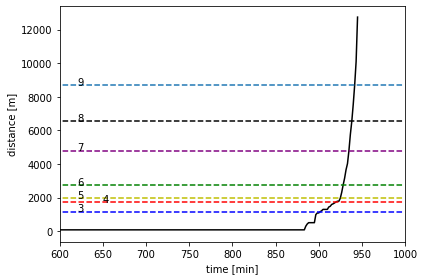

In [39]:
# for agent120145:
plt.figure()
plt.xlabel('time [min]')
plt.ylabel('distance [m]')
plt.plot(agent1_df['time']/60, agent1_df['cum_dist'], color = 'black')
plt.xlim(600,1000)
plt.plot(np.arange(1000), 1154.39 *  np.ones(1000), ls = '--', color = 'b')
plt.text(620, 1154.39 + 1, 3)
plt.plot(np.arange(1000), 1734.44 *  np.ones(1000), ls = '--', color = 'r')
plt.text(650, 1734.44 + 1, 4)
plt.plot(np.arange(1000), 1954.6 *  np.ones(1000), ls = '--', color = 'y')
plt.text(620, 1954.6 + 1, 5)
plt.plot(np.arange(1000), 2749.98 *  np.ones(1000), ls = '--', color = 'g')
plt.text(620, 2749.98 + 1, 6)
plt.plot(np.arange(1000), 4785.55 *  np.ones(1000), ls = '--', color = 'purple')
plt.text(620, 4785.55 + 1, 7)
plt.plot(np.arange(1000), 6537.56 *  np.ones(1000), ls = '--', color = 'black')
plt.text(620, 6537.56 + 1, 8)
plt.plot(np.arange(1000),  8699.36 *  np.ones(1000), ls = '--')
plt.text(620, 8699.36 + 1, 9)
plt.tight_layout()
plt.savefig('./agent120145_origin.png', dpi = 800)

In [34]:
agent2_df = a[a['agent_id'] == 123241].copy()
agent2_df.reset_index(drop = True, inplace = True)
agent2_df = agent2_df.append([{'agent_id': agent2_df.loc[len(agent2_df)-1,'agent_id'], 'current_link':'1',
                               'time':agent2_df.loc[len(agent2_df)-1,'time']+100,'length':0}], ignore_index = True)
agent2_df['link_attribute'] = agent2_df['current_link'].map(link_attribute_dict).fillna(-1)

agent2_routes = agents_links_dict[123241]
agent2_routes_df = pd.DataFrame(columns = ['link_id','length'])
agent2_routes_df['link_id'] = np.array(agent2_routes)
agent2_routes_df['link_id'] = agent2_routes_df['link_id'].astype('str')
agent2_routes_df['length'] = agent2_routes_df['link_id'].map(link_length_dict)
agent2_routes_df['cum_dist'] = 0
for i in range(len(agent2_routes_df)):
    if i == 0:
        agent2_routes_df.loc[i, 'cum_dist'] = 0
    else:
         agent2_routes_df.loc[i, 'cum_dist'] = agent2_routes_df.loc[i-1, 'cum_dist'] + agent2_routes_df.loc[i-1, 'length']
agent2_routes_cum_dict = dict(zip(agent2_routes_df['link_id'], agent2_routes_df['cum_dist']))
agent2_df['cum_dist'] = agent2_df['current_link'].map(agent2_routes_cum_dict).fillna(0)

In [36]:
agent2_df.to_csv('./agent123241_origin.csv', index = False)

In [ ]:
# for agent123241:
plt.figure()
plt.xlabel('time [min]')
plt.ylabel('distance [m]')
plt.plot(agent1_df['time']/60, agent1_df['cum_dist'], color = 'black')
plt.xlim(600,1000)
plt.plot(np.arange(1000), 1154.39 *  np.ones(1000), ls = '--', color = 'b')
plt.text(620, 1154.39 + 1, 3)
plt.plot(np.arange(1000), 1734.44 *  np.ones(1000), ls = '--', color = 'r')
plt.text(650, 1734.44 + 1, 4)
plt.plot(np.arange(1000), 1954.6 *  np.ones(1000), ls = '--', color = 'y')
plt.text(620, 1954.6 + 1, 5)
plt.plot(np.arange(1000), 2749.98 *  np.ones(1000), ls = '--', color = 'g')
plt.text(620, 2749.98 + 1, 6)
plt.plot(np.arange(1000), 4785.55 *  np.ones(1000), ls = '--', color = 'purple')
plt.text(620, 4785.55 + 1, 7)
plt.plot(np.arange(1000), 6537.56 *  np.ones(1000), ls = '--', color = 'black')
plt.text(620, 6537.56 + 1, 8)
plt.plot(np.arange(1000),  8699.36 *  np.ones(1000), ls = '--')
plt.text(620, 8699.36 + 1, 9)
plt.tight_layout()
plt.savefig('./agent120145_origin.png', dpi = 800)